                         DETECTING FACE MASK USING PRE TRAINED MOBILENET MODEL



In [ ]:
INTRODUCTION

In the present study, I will be talking about face mask detection using a convolutional neural network that will detect face masks on people's faces. The problem I will be addressing throughout this paper originated from the Wuhan province of china in 2019 called the covid SARS-19 virus. The spread of this virus is a health emergency and a pandemic across continents. To stop the spread of the virus governments across the world came up with a recommendation and urged people to wear face masks in an indoor setting or when in close contact with people while traveling or socialising.
 A deep convolutional neural network-based pre-trained MobileNEt model is used along with  facemask images dataset. For this purpose, we have used MobileNet pre-trained models to obtain higher prediction accuracies for the dataset which contains images of people with masks and people without the mask.
 The report is structed as follows. The method section talks about the CNN neural network and the pre trained model.The result 
 section presents the result obtained from the training and test data.


In [86]:
#installing the necessary libraries and dependencies for the project including tensorflow,keras,sklearn,matplotlib and numpy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
#using the dir we are giving the link to the dataset which is stored in the local machine.
dir = r"C:\Users\praj46\Downloads\covid19 face mask detection\New Masks Dataset"
#the categories which will be used in the dataset for detection is mask and non mask.
CATEGORIES  = ["Mask", "Non Mask"]


In [3]:
#we will be initialising the learning rate
INIT_LR = 1e-4
#Setting the number of epochs 
EPOCHS = 20
#setting the batch size
BS = 32


In [45]:
data = []
labels = []


In [46]:
for category in CATEGORIES:
    path = os.path.join(dir, category)
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        image = load_img(img_path, target_size=(224, 224))
        image = img_to_array(image)
        image = preprocess_input(image)

        data.append(image)
        labels.append(category)
       

METHODS:

In the present study, images were obtained from Kaggle. The Data was collected and shared by Prithviraj Mitra. The dataset consists of 1006 images of people wearing a face mask to prevent covid19. The dataset is divided into training, test, and validation sets.
The training set consists of 300 people wearing the face mask and the other 300 without the mask. The test dataset contains 50 people wearing the face and 50 without the face mask. Finally, the validation set consists of 306 images of people with and without face masks.

"Deep learning models have been used successfully in many areas such as classification, segmentation and lesion
detection of medical data. Analysis of image and signal data was obtained with medical imaging techniques such as magnetic resonance imaging (MRI), computed tomography (CT) and X-ray with the help of deep learning models. As a result of these analyzes, detection and diagnosis of diseases such as diabetes mellitus, brain tumor, skin cancer and breast cancer
are provided in studies with convenience" (Narin et al 2021,p3)
Convolutional neural network is used in this study, as CNN model works better on image data.CNN has two layers.
 The first layer is to extract the features from the image, which will be done by the convolutional layer followed by a pooling layer. The second task for those features is to classify the images into Mask and non Mask categories. This will be achieved by back-end classifier layers that will output the prediction.

Pre Trained Model:

 "MobileNet is a streamlined architecture that uses depthwise separable convolutions to construct lightweight deep convolutional neural networks and provides an efficient model for mobile and embedded vision applications. Depthwise separable convolution filters are composed of depthwise convolution filters and point convolution filters. depthwise convolution filter performs a single convolution on each input channel, and the point convolution filter combines the output of depthwise convolution linearly with 1 * 1 convolutions".(wang et al,2020,p2)

Experimental Setup

In [ ]:
In this study the experiment was conducted on Jupyter Notebook and pythong programming language is used.The study did not use any 
GPU for running of the model.MobileNet Pre trained CNN model is used.The learning rate,number of epochs and batch size is set
to 1e-4,20 and 32 respectively.


In [47]:
#we will be performing one hot encoding to convert the categorical variable into numerical one.
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)



In [48]:
# the data will be converted to arrays using the below code.
data = np.array(data, dtype="float32")
labels = np.array(labels)


In [49]:
#the dataset will be split further into train and test data
(trainX, testX, trainY, testY) = train_test_split(data, labels,
    test_size=0.20, stratify=labels, random_state=42)



In [50]:
#Data augementation will be done by using the below code to increase the size of the data
augmentation = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest")

In [63]:
# Mobelnet pre trained model is loaded as the top layer
maskModel = MobileNetV2(weights="imagenet", include_top=False,
    input_tensor=Input(shape=(224, 224, 3)))


In [64]:
# construct the head of the model that will be placed on top of the
# the base model
Model = maskModel.output
Model = AveragePooling2D(pool_size=(7, 7))(Model)
Model = Flatten(name="flatten")(Model)
Model = Dense(128, activation="relu")(Model)
Model = Dropout(0.5)(headModel)
Model = Dense(2, activation="softmax")(Model)

In [87]:

# place the head FC model on top of the base model (this will become
# the actual model we will train)
model = Model(inputs=maskModel.input, outputs=Model)



In [88]:
# for loop is used on the mask model so it doesn't get trained in the first settings.
for layer in maskModel.layers:
	layer.trainable = False

In [89]:
# compiling our model
print("[INFO] compiling model...")
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,
    metrics=["accuracy"])

[INFO] compiling model...


In [92]:
# training our model
print("training ")
H = model.fit(
    augmentation.flow(trainX, trainY, batch_size=BS),
    steps_per_epoch=len(trainX) // BS,
    validation_data=(testX, testY),
    validation_steps=len(testX) // BS,
    epochs=EPOCHS)


[INFO] training head...
Epoch 1/20
15/15 [==============================] - 37s 2s/step - loss: 0.7485 - accuracy: 0.5938 - val_loss: 0.5454 - val_accuracy: 0.8583
Epoch 2/20
15/15 [==============================] - 32s 2s/step - loss: 0.5414 - accuracy: 0.7958 - val_loss: 0.3917 - val_accuracy: 0.9583
Epoch 3/20
15/15 [==============================] - 32s 2s/step - loss: 0.4057 - accuracy: 0.9021 - val_loss: 0.2925 - val_accuracy: 0.9833
Epoch 4/20
15/15 [==============================] - 32s 2s/step - loss: 0.3104 - accuracy: 0.9187 - val_loss: 0.2255 - val_accuracy: 0.9833
Epoch 5/20
15/15 [==============================] - 34s 2s/step - loss: 0.2461 - accuracy: 0.9500 - val_loss: 0.1817 - val_accuracy: 0.9833
Epoch 6/20
15/15 [==============================] - 65s 4s/step - loss: 0.2055 - accuracy: 0.9604 - val_loss: 0.1482 - val_accuracy: 0.9833
Epoch 7/20
15/15 [==============================] - 38s 3s/step - loss: 0.1501 - accuracy: 0.9792 - val_loss: 0.1265 - val_accuracy: 0.9

In [93]:
#test data is used to make predictions.
print("   ")
preds = model.predict(testX, batch_size=BS)

In [94]:
#testing set contains a lot of images, we need to find the index of the label with corresponding largest predictor probability.
preds = np.argmax(predIdxs, axis=1)


In [100]:
#we will be generating a report here
print(classification_report(testY.argmax(axis=1), preds,
   target_names=lb.classes_))

print('details of the results of the model Table 1')


              precision    recall  f1-score   support

        Mask       0.97      1.00      0.98        60
    Non Mask       1.00      0.97      0.98        60

    accuracy                           0.98       120
   macro avg       0.98      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120

details of the results of the model Table 1


In [96]:
#saving the model
print("[INFO] saving mask detector model...")
model.save("mask_detector.model", save_format="h5")

[INFO] saving mask detector model...


C:\Users\praj46\Anaconda3\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


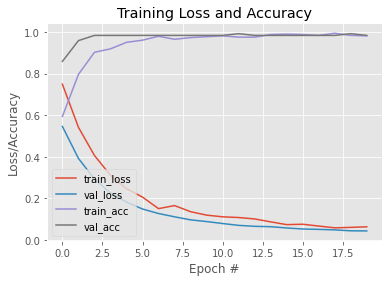

In [98]:
# plot the training loss and accuracy
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig("plot.png")

RESULTS

The study performed in this paper used binary classification with two classes  Mask and Non-Mask.In this study, MobileNet, a pre-trained model is used. The dataset is split into training and test data. The training data consists of 80% of the original data and test data contains 20% of the original dataset.
The model is trained on the given input. The training time for the MobileNet model is 60seconds.
Figure 1 depicts the accuracy and training loss. The results indicate that MobileNet is performing better and the training accuracy of the model is approximately 1. The oscillation of the model becomes more stable after 15 epochs. The graph indicates both the train and test data are similar, which shows there is no overfitting.
The detailed performance of the model is given in table 1.It is clear from the table 0.98 accuracy was reached in determining whether people wear face mask or not.

Conclusion

In [ ]:
In this study,deep learning model was proposed to detect face mask, the data was obtained from Kaggle. The resulting performance from the figure and table shows that
MobileNet pre-trained model yielded the highest accuracy of 0.98. 
In the recent pandemic the findings from this study will help the governments acrros the world to detect whether people are
wearing face masks or not, that helps in preventing the spread of the virus.
In the future studies different CNN models can be used to test by increading the size of the sample.

References:

Wang, W., Li, Y., Zou, T., Wang, X., You, J. and Luo, Y. (2020). A Novel Image Classification Approach via Dense-MobileNet Models. Mobile Information Systems, [online] 2020, pp.1–8. Available at: https://pdfs.semanticscholar.org/d1c6/beaed0297fd792499e97a33b38db5d497edb.pdf?_ga=2.36044258.333625244.1625248001-1448475053.1625248001 [Accessed 2 Jul. 2021].

‌

Narin, A., Kaya, C. and Pamuk, Z. (2021). Automatic detection of coronavirus disease (COVID-19) using X-ray images and deep convolutional neural networks. Pattern Analysis and Applications.

‌

https://moodle.essex.ac.uk/course/view.php?id=15076